<a href="https://colab.research.google.com/github/nikhilbansal23/Fraudsters-Detection/blob/main/Fraudsters_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#imposting libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import datetime as dt
from datetime import datetime as dt1

In [97]:
countries = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/countries.csv")
currency_details = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/currency_details.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/transactions.csv")
users = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/users.csv")


In [35]:
#this stops data truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
print("Total records in users data frame " + str(len(users)))
print("Total records in transaction data frame " + str(len(transactions)))
print("Total records in countries data frame " + str(len(countries)))
print("Total records in currency_details data frame " + str(len(currency_details)))


Total records in users data frame 9944
Total records in transaction data frame 688651
Total records in countries data frame 226
Total records in currency_details data frame 184


Stiching Data Together

In [98]:
cust = users.merge(transactions,left_on = 'ID',right_on='USER_ID',how='inner')

In [99]:
cust = cust.merge(countries,left_on = 'COUNTRY',right_on='CODE',how='inner')

In [100]:
customer_data =  cust.merge(currency_details,left_on = 'CURRENCY',right_on='CCY',how='inner')

In [101]:
#user status - STATE_x user_state
#transaction status - STATE_y transaction_state
# user id - ID_x	user_id
# transaction id - ID_y transaction_id
# user creation date - CREATED_DATE_x user_creation_date
# transaction create date - CREATED_DATE_y transaction_creation_date

cols_rename = {'STATE_x' : 'user_state', "STATE_y":"transaction_state", "ID_x":'user_id',"ID_y":"transaction_id","CREATED_DATE_x":"user_creation_date","CREATED_DATE_y":"transaction_creation_date"}
customer_data.rename(columns= cols_rename,inplace=True)

In [102]:
customer_data.drop(['USER_ID'], axis=1, inplace = True)


In [103]:
customer_data = customer_data.loc[:, ~customer_data.columns.duplicated()]

In [104]:
#lowercasing dataframe headers
customer_data.columns = [x.lower() for x in customer_data.columns]

In [105]:
# reducing columns - code,ccy
customer_data.drop(['code','ccy'], axis=1, inplace = True)


In [106]:
customer_data.groupby(['is_fraudster'])['user_id'].count()

is_fraudster
False    624433
True      13914
Name: user_id, dtype: int64

In [46]:
customer_data.describe()

,has_email,birth_year,failed_sign_in_attempts,amount,amount_usd,numcode,phonecode,exponent
count,638347.000000,638347.000000,638347.000000,6.383470e+05,5.857320e+05,638347.000000,638347.000000,638347.000000
mean,0.989249,1984.943445,0.009341,3.249031e+04,6.861673e+03,641.720469,109.226206,2.002951
std,0.103129,9.885179,0.139696,2.381297e+06,7.504013e+04,232.344865,131.069434,0.188669
min,0.000000,1927.000000,0.000000,0.000000e+00,0.000000e+00,32.000000,30.000000,0.000000
25%,1.000000,1980.000000,0.000000,4.670000e+02,3.460000e+02,440.000000,44.000000,2.000000
50%,1.000000,1987.000000,0.000000,1.393000e+03,1.008000e+03,826.000000,44.000000,2.000000
75%,1.000000,1992.000000,0.000000,5.000000e+03,3.689000e+03,826.000000,48.000000,2.000000
max,1.000000,2000.000000,6.000000,9.000000e+08,1.641211e+07,826.000000,594.000000,8.000000


In [115]:
date_columns = ['user_creation_date','transaction_creation_date','terms_version']
customer_data[date_columns] = customer_data[date_columns].apply(pd.to_datetime)

In [83]:
# customer_data.info()

In [108]:
print("Combined dataframes column count is " +str(len(customer_data.columns)))

Combined dataframes column count is 28


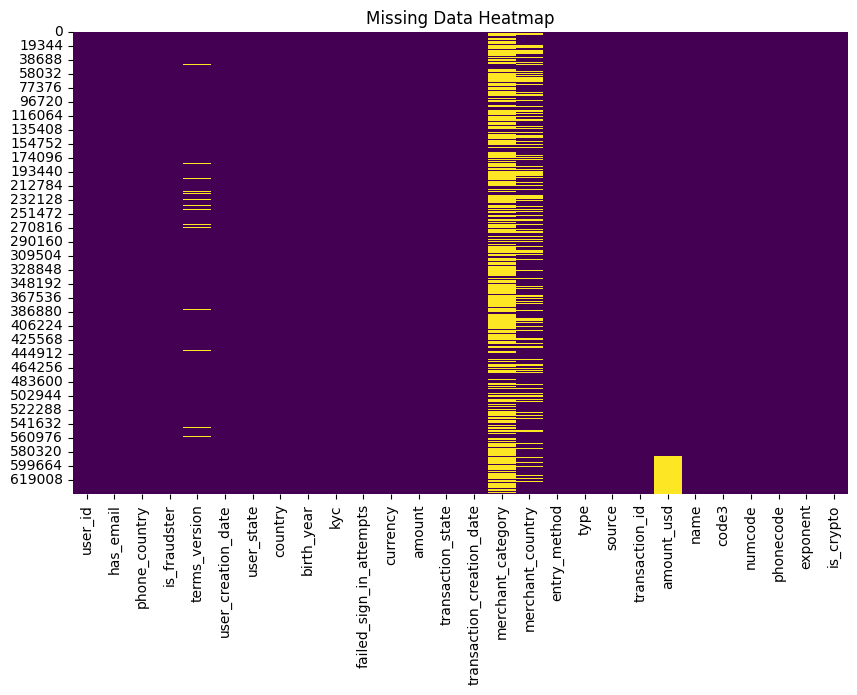

In [109]:
missing_data = customer_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [54]:
print("More than 50% of values are null in Merchant country  " + str("{:.2%}".format((customer_data['merchant_category'].isnull().sum()/len(customer_data)))))


More than 50% of values are null in Merchant country  67.33%


In [55]:
# # (customer_data['amount_usd'].isnull().sum()/len(customer_data))*100
# customer_data.groupby('merchant_category')['user_id'].count().sort_values(byascending=False)
# customer_data.groupby(by=['merchant_category'], sort=False)['user_id'].count()
(customer_data['terms_version'].isnull().sum()/len(customer_data))*100

4.019443970129099

In [56]:
customer_data.groupby(by=['terms_version'], sort=False)['user_id'].count()

terms_version
2018-05-25    212956
2018-01-01      7345
2018-09-20    298402
2018-03-20     78452
2017-01-16      6844
2017-02-02      3105
2018-01-13      5585
Name: user_id, dtype: int64

In [110]:
df = customer_data

In [111]:
df['user_creation_quarter'] = df['user_creation_date'].dt.quarter

In [112]:
df['user_creation_year'] = df['user_creation_date'].dt.year
df['user_creation_month'] = df['user_creation_date'].dt.month

In [113]:
df['transaction_creation_quarter'] = df['transaction_creation_date'].dt.quarter
df['transaction_creation_year'] = df['transaction_creation_date'].dt.year
df['transaction_creation_month'] = df['transaction_creation_date'].dt.month

In [116]:
df['terms_version_quarter'] = df['terms_version'].dt.quarter
df['terms_version_year'] = df['terms_version'].dt.year
df['terms_version_month'] = df['terms_version'].dt.month

In [117]:
df.drop(['user_creation_date','transaction_creation_date','terms_version'], axis=1, inplace = True)


In [118]:
df.drop(['phone_country','phonecode','numcode','exponent'], axis=1, inplace = True)


In [120]:
df.drop(['country'], axis=1, inplace = True)


In [125]:
df.drop(['code3'], axis=1, inplace = True)


In [124]:
# df.groupby('code3',sort=False)['user_id'].count()

In [121]:
cols_rename = {'name' : 'country'}
df.rename(columns= cols_rename,inplace=True)

In [133]:
current_year = dt1.now().year
df['user_age'] = current_year - df['birth_year']

In [135]:
df.drop(['birth_year'], axis=1, inplace = True)


In [136]:
df.head()

,user_id,has_email,is_fraudster,user_state,kyc,failed_sign_in_attempts,currency,amount,transaction_state,merchant_category,merchant_country,entry_method,type,source,transaction_id,amount_usd,country,is_crypto,user_creation_quarter,user_creation_year,user_creation_month,transaction_creation_quarter,transaction_creation_year,transaction_creation_month,terms_version_quarter,terms_version_year,terms_version_month,user_age
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,False,ACTIVE,PASSED,0,GBP,50000,COMPLETED,NaN,NaN,misc,TOPUP,HERA,29df55ae-accd-47c2-85f6-ed499703b75d,37130.0,United Kingdom,False,3,2017,8,2,2018,5,2.0,2018.0,5.0,52
1,1872820f-e3ac-4c02-bdc7-727897b60043,1,False,ACTIVE,PASSED,0,GBP,1000,COMPLETED,NaN,NaN,misc,TOPUP,HERA,1a050680-bb84-436f-a93b-79b7e75775db,749.0,United Kingdom,False,3,2017,8,3,2017,8,2.0,2018.0,5.0,52
2,1872820f-e3ac-4c02-bdc7-727897b60043,1,False,ACTIVE,PASSED,0,GBP,100,REVERTED,NaN,NaN,misc,TOPUP,HERA,826381fe-8248-4616-993d-ceb52fb04807,74.0,United Kingdom,False,3,2017,8,3,2017,8,2.0,2018.0,5.0,52
3,545ff94d-66f8-4bea-b398-84425fb2301e,1,False,ACTIVE,PASSED,0,GBP,500,COMPLETED,NaN,NaN,misc,P2P,INTERNAL,40ad821f-db81-4f8f-b7c6-6d7acc50e836,376.0,United Kingdom,False,1,2017,3,3,2018,7,1.0,2018.0,1.0,41
4,545ff94d-66f8-4bea-b398-84425fb2301e,1,False,ACTIVE,PASSED,0,GBP,499,COMPLETED,NaN,NaN,misc,P2P,INTERNAL,b0c2b678-fe57-4ced-b03c-43178c5834bd,375.0,United Kingdom,False,1,2017,3,3,2018,7,1.0,2018.0,1.0,41


In [138]:
# check  = df[df['user_id'] == '545ff94d-66f8-4bea-b398-84425fb2301e']
# check.groupby('transaction_id',sort=False)['user_id'].count()
len(df.columns)

28

<Axes: ylabel='is_fraudster'>

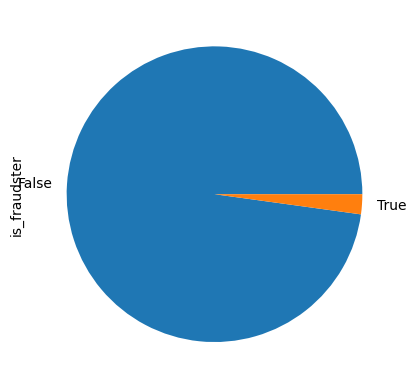

In [140]:
df["is_fraudster"].value_counts().plot.pie()

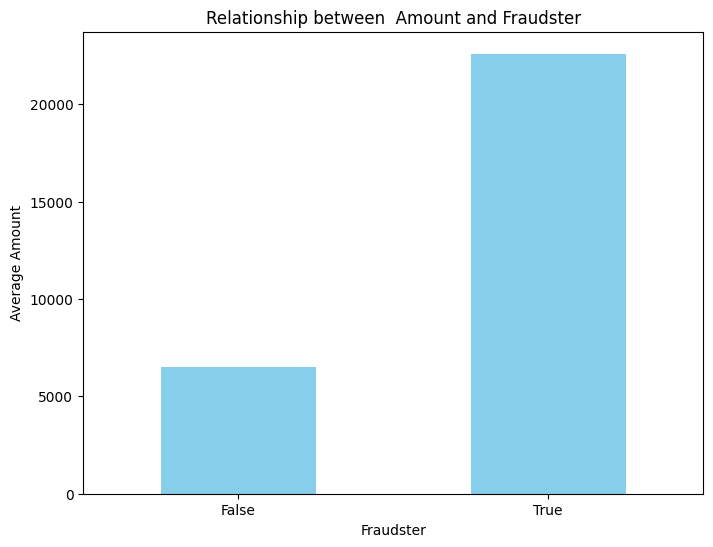

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'loan_percentage_income' and 'loan_default'

# Group the data by 'loan_default' and calculate the mean loan_percentage_income for each category
grouped = df.groupby('is_fraudster')['amount_usd'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Fraudster')
plt.ylabel('Average Amount')
plt.title('Relationship between  Amount and Fraudster')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

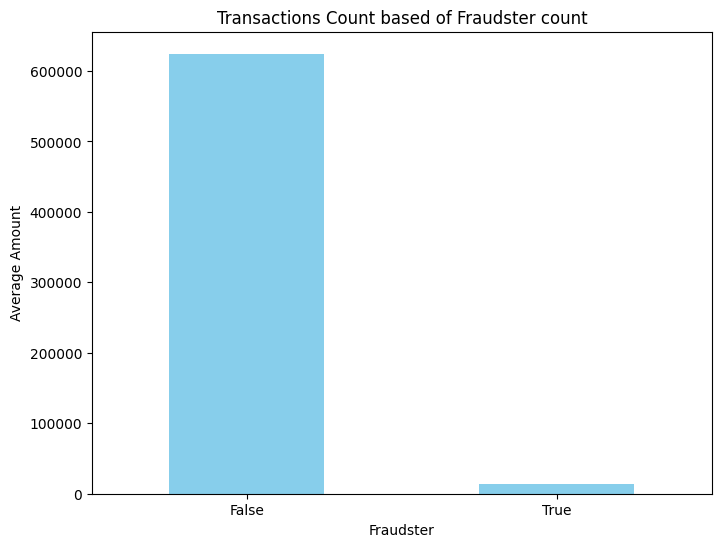

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'loan_percentage_income' and 'loan_default'

# Group the data by 'loan_default' and calculate the mean loan_percentage_income for each category
grouped = df.groupby('is_fraudster')['transaction_id'].count()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Fraudster')
plt.ylabel('Average Amount')
plt.title('Transactions Count based of Fraudster count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [148]:
df.corr()

<ipython-input-148-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,has_email,is_fraudster,failed_sign_in_attempts,amount,amount_usd,is_crypto,user_creation_quarter,user_creation_year,user_creation_month,transaction_creation_quarter,transaction_creation_year,transaction_creation_month,terms_version_quarter,terms_version_year,terms_version_month,user_age
has_email,1.000000,0.012753,-0.001184,0.001176,0.003530,0.003119,0.036684,0.111014,0.035111,0.000524,0.144836,-0.000376,0.024302,0.008823,0.024760,0.010181
is_fraudster,0.012753,1.000000,0.000002,-0.000126,0.032332,-0.003390,-0.032916,0.097714,-0.033495,-0.046002,0.032742,-0.041914,-0.181440,-0.039706,-0.166308,-0.050662
failed_sign_in_attempts,-0.001184,0.000002,1.000000,-0.000539,0.002064,-0.002001,0.005527,-0.012490,0.008185,-0.004436,-0.019169,-0.003928,-0.018722,-0.018342,-0.018817,-0.021917
amount,0.001176,-0.000126,-0.000539,1.000000,0.995787,0.210695,0.003219,0.002905,0.003978,-0.003698,0.005704,-0.003373,0.002775,0.001276,0.002579,0.006586
amount_usd,0.003530,0.032332,0.002064,0.995787,1.000000,NaN,-0.001341,-0.003237,-0.000131,-0.004094,-0.002499,-0.003976,0.001934,0.001145,0.002484,0.035452
is_crypto,0.003119,-0.003390,-0.002001,0.210695,NaN,1.000000,0.020228,0.005029,0.023407,-0.015831,0.018778,-0.015743,-0.001744,0.003907,-0.001817,0.002538
user_creation_quarter,0.036684,-0.032916,0.005527,0.003219,-0.001341,0.020228,1.000000,-0.413384,0.968454,0.063648,-0.031347,0.065836,0.046448,0.006879,0.034229,-0.014265
user_creation_year,0.111014,0.097714,-0.012490,0.002905,-0.003237,0.005029,-0.413384,1.000000,-0.422605,-0.119878,0.536253,-0.133435,0.043340,0.113142,0.051260,-0.062874
user_creation_month,0.035111,-0.033495,0.008185,0.003978,-0.000131,0.023407,0.968454,-0.422605,1.000000,0.060639,-0.024148,0.063820,0.048923,0.010600,0.036923,-0.011557
transaction_creation_quarter,0.000524,-0.046002,-0.004436,-0.003698,-0.004094,-0.015831,0.063648,-0.119878,0.060639,1.000000,-0.496604,0.957697,0.020989,-0.004532,0.014245,0.017382
